# 개요



- 자연어 (Natural Language)
  - 인간이 평소에 말하는 음성, 텍스트(글로 옮기면)
    - 음성 수집 : AI 스피커, 스마트폰 비서기능
    - 텍스트 : PDF(OCR, 이미지 -> AI 통해서 텍스트 추출)

- 자연어 처리
  - Netural Language Processing (**NLP**)
  - **자연어(사람의 언어)를 컴퓨터가 인식하고, 처리하는 것**

- 특징
  - 지연어 처리는 대표적인 비지도 학습이다 (대부분)
  - 텍스트 자체가 데이터 이면서 정답이다 (순수 데이터 관점에서 보면 feature만 있으므로)

  

# 한국어 어려움, 난이도

- 모호성, 동일한 의미를 가지는 다양한 표현들이 존재, 불연속 데이터

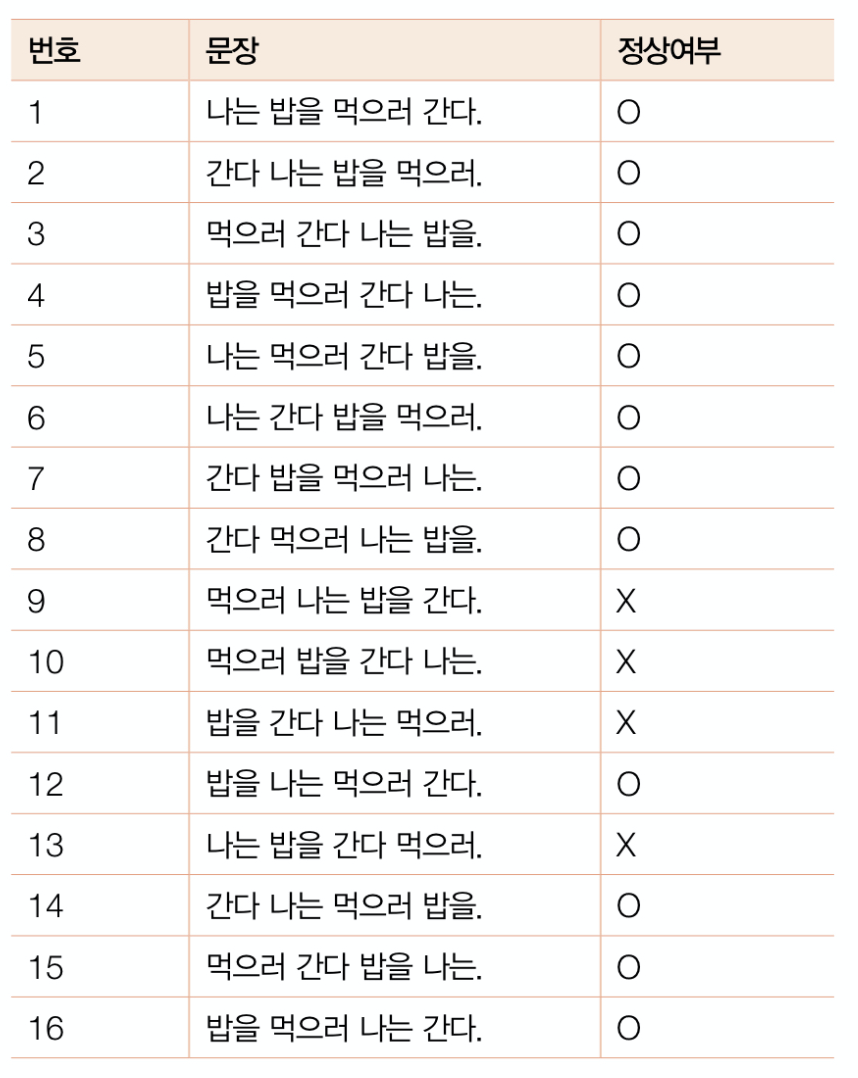

In [1]:
from IPython.display import Image
Image('/content/drive/MyDrive/bigDataClass/deeplearning/day4/rnn/같은의미.png')

- 교착어, 띄어쓰기 (제각각), 신조어/은어(줄임말), 평서문/의무문(?, !, 등등 ... 뉘앙스 바뀜)
- 표현이 풍부하지만, 해석이 제각각일 수 있다
- 주어도 자주 생략
- 한자기반언어, 한글(표음문자), 한자(표의문자)등이 차이점으로 인해 정보손실 문제도 발생

# 텍스트를 수치화 하는 절차

- 학습에 텍스트 데이터를 넣기까지의 과정
- 일반 모델 (RNN, LSTM, ... 기본모델) or 사전 학습된 모델(Bert, Bart, GPT, ...)이 사용하는 데이터 형식이 일부 다름

## 일반 절차

- **텍스트** 데이터 -> .. -> 연속적 **벡터**(**수치** 형태)
- 전처리
  - **말뭉치(문장 덩어리) -> 분절화(성분별로 분해, 명사, 동사, 조사, ...; 다양한 토큰화 라이브러리) -> 사전화(voca, ...; 인덱싱) -> 벡터화(인덱스를 기반으로 텍스트를 수치로 표현) -> 원-핫 인코딩(one-hot encoding;인덱스를 0 or 1) 대체(데이터가 커짐) -> 압축 (단어 임베딩) -> 정규화(필요시) -> 학습 데이터 준비 완료**

- 분절도구 (형태소 분석기, 토크나이저)
  - NLTK (영어권)
  - konlpy (한국어)
    - <a href='https://konlpy.org/ko/latest/index.html'>공홈</a>
    - Hannanum Class, Kkma Class
, Komoran Class, **Mecab Class**
, Okt Class
  - 딥러닝 엔진에서도 제공(API)


- 용어 정리
  - **토큰** : 단어별, 문장별, 형태소별 등등 더이상 나눠질 수 없는 단위
  - 토큰을 만드는 과정 : **토큰화**(tokenization)

# 토큰화 (영어 데이터, 한글 데이터) - 사전화 동시에 진행됨

In [2]:
# 케라스 지원 도구 활용
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [3]:
# 분절의 대상 텍스트 획득
src_text = '합류한 지 얼마 되지 않았지만, 프레이저 포스터와 손흥민이 벌써부터 절친 케미를 자랑했다.'
src_text

'합류한 지 얼마 되지 않았지만, 프레이저 포스터와 손흥민이 벌써부터 절친 케미를 자랑했다.'

In [4]:
# 토큰화 처리
res = text_to_word_sequence(src_text)
print(res)
print(src_text)
# 조사 제거(, .), 공백 중심으로 토큰화

['합류한', '지', '얼마', '되지', '않았지만', '프레이저', '포스터와', '손흥민이', '벌써부터', '절친', '케미를', '자랑했다']
합류한 지 얼마 되지 않았지만, 프레이저 포스터와 손흥민이 벌써부터 절친 케미를 자랑했다.


- 토큰화 이후 중요한 정보
  - 수치화 -> 학습데이터 구성
  - 빈도 계산
    - Bag of Words
    - 이 말뭉치의 중요 단어를 표현 하는 기법
  - 순서 (시퀀스)
    - 순환 신경망의 대상이 되는 데이터(순서, 타임, 시퀀스)
  - 연관성 분석

In [5]:
# 1. 말뭉치 획득
with open('/content/drive/MyDrive/bigDataClass/deeplearning/day4/rnn/NLP_bow.txt') as f:
  docs = f.read()
docs = docs.split('\n')
docs

['펩 과르디올라 감독이 맨체스터 시티와 동행을 이어갈 예정이다.',
 "브라질 대표팀 부임설이 있었지만, 맨체스터 시티 숙원의 과제 '유럽 제패'를 풀려고 한다.",
 "영국 공영방송 'BBC'가 6일(한국시간) 유럽 축구 가십란에서 과르디올라 감독 재계약을 알렸다.",
 '\'데일리 스타\' 인용 보도였는데 "과르디올라 감독이 에티하드 스타디움에서 3년 더 보낼 예정"이라고 설명했다.',
 '과르디올라 감독은 2016년 여름에 맨체스터 시티 지휘봉을 잡았다. ',
 '대대적인 방출과 천문학적인 돈을 투입해 팀 체질 개선에 나섰다. ',
 '매년 여름 평균 1억 5000만 유로(약 2000억 원)를 지출하면서 프리미어리그 우승 경쟁 팀으로 탈바꿈했다.',
 '바르셀로나 시절, 당시에 전무후무했던 6관왕 위업을 해냈기에 빅이어를 노렸다.',
 '하지만 2016년부터 현재까지 딱 한 번 챔피언스리그 결승전에 진출했다.',
 '5일 새벽에 열렸던 2021-22시즌 챔피언스리그 준결승 2차전에서 선제골을 넣고도 레알 마드리드에 덜미를 잡혀 졌다.']

In [6]:
# 2. 토큰화
from tensorflow.keras.preprocessing.text import Tokenizer

# 도구 생성
tokenizer = Tokenizer() # 토큰화 처리 객체 생성
tokenizer.fit_on_texts(docs) # 토큰화 처리

In [7]:
# 단어의 빈도를 계산해서 출력 -> 자동 계산
print(tokenizer.word_counts)
# '과르디올라' 가 이 말뭉치의 중요한 토큰이다

OrderedDict([('펩', 1), ('과르디올라', 4), ('감독이', 2), ('맨체스터', 3), ('시티와', 1), ('동행을', 1), ('이어갈', 1), ('예정이다', 1), ('브라질', 1), ('대표팀', 1), ('부임설이', 1), ('있었지만', 1), ('시티', 2), ('숙원의', 1), ('과제', 1), ("'유럽", 1), ("제패'를", 1), ('풀려고', 1), ('한다', 1), ('영국', 1), ('공영방송', 1), ("'bbc'가", 1), ('6일', 1), ('한국시간', 1), ('유럽', 1), ('축구', 1), ('가십란에서', 1), ('감독', 1), ('재계약을', 1), ('알렸다', 1), ("'데일리", 1), ("스타'", 1), ('인용', 1), ('보도였는데', 1), ('에티하드', 1), ('스타디움에서', 1), ('3년', 1), ('더', 1), ('보낼', 1), ('예정', 1), ('이라고', 1), ('설명했다', 1), ('감독은', 1), ('2016년', 1), ('여름에', 1), ('지휘봉을', 1), ('잡았다', 1), ('대대적인', 1), ('방출과', 1), ('천문학적인', 1), ('돈을', 1), ('투입해', 1), ('팀', 1), ('체질', 1), ('개선에', 1), ('나섰다', 1), ('매년', 1), ('여름', 1), ('평균', 1), ('1억', 1), ('5000만', 1), ('유로', 1), ('약', 1), ('2000억', 1), ('원', 1), ('를', 1), ('지출하면서', 1), ('프리미어리그', 1), ('우승', 1), ('경쟁', 1), ('팀으로', 1), ('탈바꿈했다', 1), ('바르셀로나', 1), ('시절', 1), ('당시에', 1), ('전무후무했던', 1), ('6관왕', 1), ('위업을', 1), ('해냈기에', 1), ('빅이어를', 1), ('노렸다', 1), ('

In [8]:
print(' 뭉치에 들어있는 문장의 개수', tokenizer.document_count)
# 여러 문장에서 특정 토큰이 발견된다
print(' 각 단어가 몇개의 문장에 포함되었는가?', tokenizer.word_docs)
# 0은 비워둔다, 이것을 이용하면 특정 문장을 수치로 표현할수 있다
print(' 각 단어(토큰)의 인덱스 값(사전)', tokenizer.word_index)

 뭉치에 들어있는 문장의 개수 10
 각 단어가 몇개의 문장에 포함되었는가? defaultdict(<class 'int'>, {'이어갈': 1, '감독이': 2, '시티와': 1, '동행을': 1, '과르디올라': 4, '맨체스터': 3, '예정이다': 1, '펩': 1, '풀려고': 1, '부임설이': 1, "'유럽": 1, '한다': 1, '대표팀': 1, '시티': 2, '숙원의': 1, "제패'를": 1, '브라질': 1, '있었지만': 1, '과제': 1, '한국시간': 1, "'bbc'가": 1, '6일': 1, '공영방송': 1, '영국': 1, '가십란에서': 1, '유럽': 1, '알렸다': 1, '재계약을': 1, '감독': 1, '축구': 1, '이라고': 1, '보도였는데': 1, '에티하드': 1, '인용': 1, '설명했다': 1, '3년': 1, '스타디움에서': 1, '더': 1, "'데일리": 1, '예정': 1, '보낼': 1, "스타'": 1, '감독은': 1, '2016년': 1, '잡았다': 1, '지휘봉을': 1, '여름에': 1, '방출과': 1, '돈을': 1, '체질': 1, '나섰다': 1, '대대적인': 1, '개선에': 1, '팀': 1, '투입해': 1, '천문학적인': 1, '여름': 1, '2000억': 1, '원': 1, '유로': 1, '매년': 1, '약': 1, '를': 1, '우승': 1, '1억': 1, '탈바꿈했다': 1, '평균': 1, '팀으로': 1, '지출하면서': 1, '경쟁': 1, '5000만': 1, '프리미어리그': 1, '해냈기에': 1, '당시에': 1, '빅이어를': 1, '바르셀로나': 1, '전무후무했던': 1, '6관왕': 1, '위업을': 1, '노렸다': 1, '시절': 1, '결승전에': 1, '진출했다': 1, '번': 1, '딱': 1, '2016년부터': 1, '한': 1, '하지만': 1, '챔피언스리그': 2, '현재까지': 1, '선제골을': 1, '

# 벡터화(원-핫 인코딩)

- 문장 1개를 가지고 테스트

In [9]:
text = docs[0]
text

'펩 과르디올라 감독이 맨체스터 시티와 동행을 이어갈 예정이다.'

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

In [11]:
tokenizer.word_index

{'펩': 1,
 '과르디올라': 2,
 '감독이': 3,
 '맨체스터': 4,
 '시티와': 5,
 '동행을': 6,
 '이어갈': 7,
 '예정이다': 8}

In [12]:
# 텍스트 -> 토큰화 -> 사전화(인덱싱) -> 수치로 표현된 문장
x = tokenizer.texts_to_sequences([text])
print(x)
# 텍스트 데이터를 넣어서 수치로 표현

[[1, 2, 3, 4, 5, 6, 7, 8]]


In [13]:
# 원-핫 인코딩 표현
# 원-핫 인코딩 후 맨 앞의 숫자가 1이 되면 안된다 (내부 룰)
from tensorflow.keras.utils import to_categorical

x1 = to_categorical(x,len(tokenizer.word_index)+1)
print(x1)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1.]]]


- 원-핫 인코딩 문제점
  - 말뭉치가 클수록 -> 사전에 등록된 단어가 많게된다 -> 원-핫 인코딩시 백터의 크기도 커진다
  - 사전의 수가 10만개 -> 인코딩 -> 단어 1개(10만 +1) 크기(feature)가 필요
  - 압축을 해서 용량을 줄이자 -> 단어 임베딩

# 단어 임베딩(word embeding)
- 원리
  - 주어진 배열(백터)를 정해진 길이로 압축
  - 내부적으로 이를 처리하기 위해
    - 단어 유사도 계산
    - happy는 good에 좀더 가깝다. bad보다
  - 딥러닝 엔진에서 제공, 사전 학습된 모델도 제공

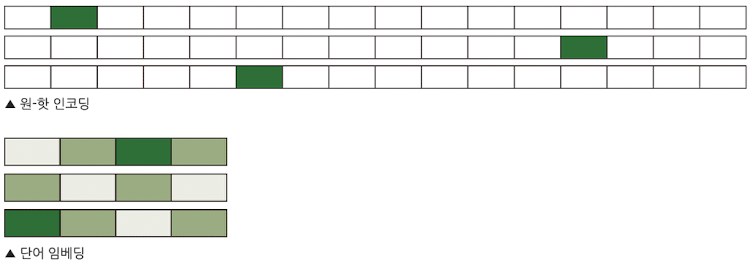

In [14]:
Image('/content/drive/MyDrive/bigDataClass/deeplearning/day4/rnn/원-핫인코딩vs단어임베딩.png')

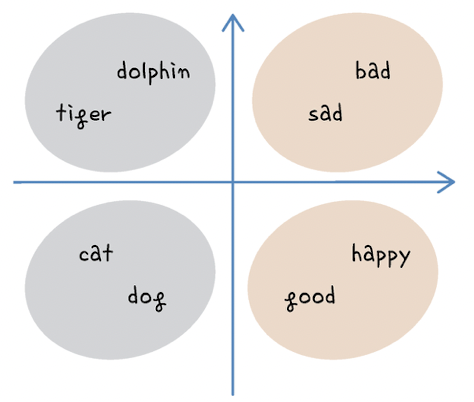

In [15]:
# 단어 유시도
Image('/content/drive/MyDrive/bigDataClass/deeplearning/day4/rnn/단어유사도.png')

- 실제 간단한 프로젝트 진행하면서 확인

# 패딩

- 보정
- 말뭉치를 구성하는 문장들의 길이는 각각 상이하다
- 텍스트 -> 분절 -> 수치화 -> 원-핫 처리 크기는 제각각일수있다
-동일 크기로 문장 데이터를 표현하자
  - 어떤 문장은 남을 것이다 -> 뭔가로 채운다
  - 어떤 문장은 넘칠 것이다 -> 자른다 (임배딩 관점에서는 중요도에 따라 잘라지는 데이터가 다르다)

In [16]:
docs = ['아 더빙.. 진짜 짜증나네요 목소리',
'흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
'너무재밓었다그래서보는것을추천한다',
'교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
'사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
"막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움."]
docs

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.']

In [17]:
labels=[0, 1, 0, 0, 1, 0]

In [18]:
# 토큰화 및 사전화
tokenizer = Tokenizer()
tokenizer.fit_on_texts(docs)

In [19]:
print(tokenizer.word_index)

{'아': 1, '더빙': 2, '진짜': 3, '짜증나네요': 4, '목소리': 5, '흠': 6, '포스터보고': 7, '초딩영화줄': 8, '오버연기조차': 9, '가볍지': 10, '않구나': 11, '너무재밓었다그래서보는것을추천한다': 12, '교도소': 13, '이야기구먼': 14, '솔직히': 15, '재미는': 16, '없다': 17, '평점': 18, '조정': 19, '사이몬페그의': 20, '익살스런': 21, '연기가': 22, '돋보였던': 23, '영화': 24, '스파이더맨에서': 25, '늙어보이기만': 26, '했던': 27, '커스틴': 28, '던스트가': 29, '너무나도': 30, '이뻐보였다': 31, '막': 32, '걸음마': 33, '뗀': 34, '3세부터': 35, '초등학교': 36, '1학년생인': 37, '8살용영화': 38, 'ㅋㅋㅋ': 39, '별반개도': 40, '아까움': 41}


In [20]:
# 사전을 보고 문장을 수치로 표현
x = tokenizer.texts_to_sequences(docs)
x
# 모든 문장은 수치로 표현되었지만, 크기가 제각각

[[1, 2, 3, 4, 5],
 [6, 7, 8, 9, 10, 11],
 [12],
 [13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
 [32, 33, 34, 35, 36, 37, 38, 39, 40, 41]]

In [21]:
# 최대 문장 길이 획득 -> 정보손실을 최소화 하기 위해 -> 가장 큰 문장을 기준으로 패딩 (꼭 좋은 것은 아니다)
max_len = 0
for s in x:
  if len(s) > max_len:
    max_len = len(s)
max_len

12

In [22]:
# 패딩할 크기를 획득했다 -> 최대 문장길이값을 기준으로 향후는 임의의 값으로 지정 가능함
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 규격 사이드 대로 문장을 구성하여 빈자리는 0으로 채운다
# 최대 문장길이로 패딩 -> 늘려서 채운 문장의 빈값들은 0으로 채운다
# 이 데이터가 임베딩층을 통과할 때 원-핫 인코딩이 진행되므로 1개를 늘려줘야 한다
x_padding = pad_sequences( x,max_len+1 )
x_padding
# 데이터는 뒤를 기준으로 본 데이터가 세팅, 남은 자리는 0으로 세팅
# <pad> or 0
# <nan> or 1 -> 사전에 없는 문자 발견시

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  3,  4,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  6,  7,  8,  9, 10, 11],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12],
       [ 0,  0,  0,  0,  0,  0, 13, 14, 15, 16, 17, 18, 19],
       [ 0, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [ 0,  0,  0, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]], dtype=int32)

# 간단한 인공신경망으로 긍정/부정 예측

## 인공신경망 구축 (DNN)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
# Embedding : 단어 임베딩에서 활용

In [24]:
# 토큰의 총수 + 패딩(1)
word_size = len(tokenizer.word_index) + 1
word_size

42

In [25]:
# ANN : 입력층 -> 은닉층 -> 출력층
# DNN : 입력층 -> 은닉층 -> 은닉층 -> 출력층
# DNN 관점에서 은닉층에
model = Sequential()

# 사전에 등록된 토큰이 42개이다 -> 8개로 압축해라(내부적으로 유사도 검사, ...)
# 8 : 설정값
# input_length : 문장의 최대길이 + 1 (이 데이터는 원핫 인코딩이 내부적으로 진행 -> 임베딩이 될것임)
# (None, 13, 8)
# 데이터는 none개
# 문장 한개는 13칸으로 표현
# 문장을 구성하는 토큰 1개는 8칸으로 표현
model.add( Embedding( word_size, 8, input_length=(max_len+1 ) ) )
# (None, 13*8)
model.add( Flatten() )
model.add( Dense(1, activation='sigmoid') )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 13, 8)             336       
                                                                 
 flatten (Flatten)           (None, 104)               0         
                                                                 
 dense (Dense)               (None, 1)                 105       
                                                                 
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


## 컴파일

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## 학습 및 예측

In [27]:
x_padding

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  3,  4,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  6,  7,  8,  9, 10, 11],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12],
       [ 0,  0,  0,  0,  0,  0, 13, 14, 15, 16, 17, 18, 19],
       [ 0, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [ 0,  0,  0, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]], dtype=int32)

In [28]:
import numpy as np
y = np.array(labels)
y,y.shape

(array([0, 1, 0, 0, 1, 0]), (6,))

In [29]:
# 패딩까지 마무리된 데이터를 넣으면 임베딩층을 통과할 때, 원-핫 인코딩 및 임베딩이 진행된다
model.fit(x_padding,y,epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 808ms/step - loss: 0.6938 - accuracy: 0.3333
Epoch 2/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6895 - accuracy: 0.8333
Epoch 3/20
1/1 [==============================] - 0s 8ms/step - loss: 0.6851 - accuracy: 0.8333
Epoch 4/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6808 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 7ms/step - loss: 0.6765 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6723 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 8ms/step - loss: 0.6680 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6638 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 8ms/step - loss: 0.6596 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 18ms/step - loss: 0.6554 - accuracy: 1.0000
Epoch 11/20
1/1 [===============

In [30]:
# 긍/부정 예측 -> 형식적으로 진행 -> 훈련한것 넣어서 진행 -> 83% 예상
model.evaluate(x_padding,y)

1/1 [==============================] - 0s 155ms/step - loss: 0.6092 - accuracy: 1.0000


[0.6091632843017578, 1.0]

# 문제점

- 딥러닝 엔진에서 제공하는 API는 영어를 기준으로 제공
  - 다국어 지원 취약
  - 분절화 과정에서 영어식 분절 기법으로 처리
    - 조사, 품사 등이 분해가 않된다
    - 한국어에 적합한 토큰화 라이브러리 사용

- 데이터량이 충분히 많아야 한다
  - 품질이 높은 데이터가 충분히 많아야 한다

- 결론
  - 전체적인 전처리 프로세스는 따라가되, 분절 부분만 한국형 토큰화 도구를 활용하여 처리


# konlpy 기반 하위 형태소 분석기

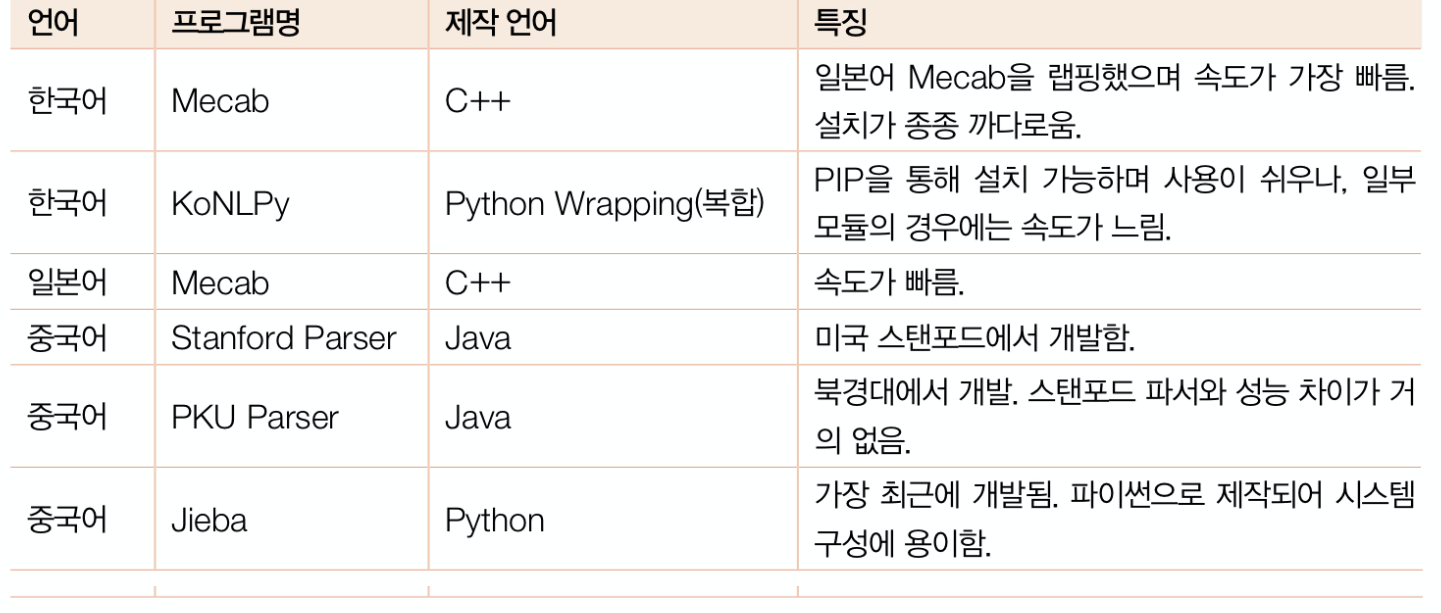

In [31]:
Image('/content/drive/MyDrive/bigDataClass/deeplearning/day4/rnn/분절.png')
# 한국어, 일본어, 중국어 분절 도구 비교

# 형태소 분석기 설치 - Mecab

In [32]:
# http://bit.ly/2StqivH

!pip install konlpy

!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

import os
os.chdir('/tmp/')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.1.tar.gz
!tar zxfv mecab-0.996-ko-0.9.1.tar.gz
os.chdir('/tmp/mecab-0.996-ko-0.9.1')
!./configure
!make
!make check
!make install

import os
os.chdir('/tmp')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.0.1-20150920.tar.gz
!tar -zxvf mecab-ko-dic-2.0.1-20150920.tar.gz
os.chdir('/tmp/mecab-ko-dic-2.0.1-20150920')
!./autogen.sh
!./configure
!make
# !sh -c 'echo "dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic" > /usr/local/etc/mecabrc'
!make install

# install mecab-python
import os
os.chdir('/content')

!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
os.chdir('/content/mecab-python-0.996')

!python3 setup.py build
!python3 setup.py install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1380k  100 1380k    0     0  1224k      0  0:00:01  0:00:01 --:--:-- 2137k
mecab-0.996-ko-0.9.1/
mecab-0.996-ko-0.9.1/config.h.in
mecab-0.996-ko-0.9.1/Makefile.train
mecab-0.996-ko-0.9.1/ChangeLog
mecab-0.996-ko-0.9.1/configure
mecab-0.996-ko-0.9.1/swig/
mecab-0.996-ko-0.9.1/swig/version.h.in
mecab-0.996-ko-0.9.1/swig/Makefile
mecab-0.996-ko-0.9.1/swig/version.h
mecab-0.996-ko-0.9.1/swig/MeCab.i
mecab-0.996-ko-0.9.1/mkinstalldirs
mecab-0.996-ko-0.9.1/mecab-config.in
mecab-0.996-ko-0.9.1/configure.in
mecab-0.996-ko-0.9.1/mecab.iss.in
mecab-0.996-ko-0.

- <a href="https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0">한국형 형태소 비교 분석표</a>

## Mecab 사용

In [33]:
from konlpy.tag import Mecab

In [34]:
# 분절 테스트를 위한 샘플 텍스트
ko_sentence = '오늘 태풍이 진짜로 왔었나요?'
ko_sentence

'오늘 태풍이 진짜로 왔었나요?'

In [35]:
# 형태소 분석기
tokenizer = Mecab()

In [36]:
# 분절 (여러 함수들이 존재)
tokenizer.morphs(ko_sentence)
# 한국어에 적합하게 분절

['오늘', '태풍', '이', '진짜', '로', '왔었', '나요', '?']

In [37]:
# 분절 + 성분
tokenizer.pos(ko_sentence)
# [ (토큰, 성분) ]

[('오늘', 'MAG'),
 ('태풍', 'NNG'),
 ('이', 'JKS'),
 ('진짜', 'NNG'),
 ('로', 'JKB'),
 ('왔었', 'VV+EP'),
 ('나요', 'EF'),
 ('?', 'SF')]

In [38]:
# 성분의 의미를 확인
tokenizer.tagset.get('MAG'),tokenizer.tagset.get('JKS')

('일반 부사', '주격 조사')

# 사전작업

- 말뭉치를 토큰화하여 사전화 > 패딩 > 원-핫 인코딩 > 임베딩 까지 절차를 편하게 구성하는 것은 케라스에서 api 제공 (유지)
- 말뭉치 자체에서 한국형 형태소 분석기를 활용하여 말뭉치를 재구성하고 (케라스 토큰화 도구에 적합) 이후 공정은 동일하게 전개
  - 데이터를 사전에 케라스의 토큰화에 적합하게 조정 하는 단계를 삽입

In [39]:
# 데이터 path
train_path = '/content/drive/MyDrive/bigDataClass/deeplearning/day4/rnn/ratings_train.txt'
test_path = '/content/drive/MyDrive/bigDataClass/deeplearning/day4/rnn/ratings_test.txt'

In [40]:
# 간단한 EDA
import pandas as pd
df_train = pd.read_csv(train_path, sep='\t', engine='python')
df_train.head(2)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1


In [41]:
' '.join(tokenizer.morphs(df_train.document[1]))

'흠 . .. 포스터 보고 초딩 영화 줄 . ... 오버 연기 조차 가볍 지 않 구나'

In [42]:
df_train.document[1]

'흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나'

In [45]:
# df_train.document의 모든 데이터를 전처리 mecab으로 분절, 다시 공백기준 합성
# -> 
def morphsJoin(x):
  if not x: return '' # 결측치는 빈 문자열로
  try:
    return ' '.join(tokenizer.morphs(x))
  except Exception as e:
    # print(x)
    return '' # 토큰화 불가한 표현 빈 문자열로 대체
df_train.document = df_train.document.apply(morphsJoin)

In [46]:
df_train

,id,document,label
0,9976970,아 더빙 . . 진짜 짜증 나 네요 목소리,0
1,3819312,흠 . .. 포스터 보고 초딩 영화 줄 . ... 오버 연기 조차 가볍 지 않 구나,1
2,10265843,너무 재 밓었 다 그래서 보 는 것 을 추천 한다,0
3,9045019,교도소 이야기 구먼 . . 솔직히 재미 는 없 다 . . 평점 조정,0
4,6483659,사이몬페그 의 익살 스런 연기 가 돋보였 던 영화 ! 스파이더맨 에서 늙 어 보이 ...,1
...,...,...,...
149995,6222902,인간 이 문제 지 . . 소 는 뭔 죄 인가 . .,0
149996,8549745,평점 이 너무 낮 아서 . ..,1
149997,9311800,이게 뭐요 ? 한국인 은 거들먹거리 고 필리핀 혼혈 은 착하 다 ?,0
149998,2376369,청춘 영화 의 최고봉 . 방황 과 우울 했 던 날 들 의 자화상,1


# 토큰화 진행

In [47]:
tokenizer = Tokenizer() # 토큰화 처리 객체 생성
tokenizer.fit_on_texts(df_train.document) # 토큰화 처리

In [48]:
# 사전의 총 개수
len(tokenizer.word_index)

53283

In [49]:
print(tokenizer.word_index)

{'이': 1, '는': 2, '영화': 3, '다': 4, '고': 5, '하': 6, '도': 7, '의': 8, '가': 9, '은': 10, '에': 11, '을': 12, '보': 13, '한': 14, '게': 15, '들': 16, '지': 17, '를': 18, '있': 19, '없': 20, '좋': 21, '나': 22, '었': 23, '만': 24, '는데': 25, '너무': 26, '봤': 27, '적': 28, '안': 29, '정말': 30, '로': 31, '음': 32, '으로': 33, '것': 34, '아': 35, '네요': 36, '재밌': 37, '점': 38, '어': 39, '같': 40, '지만': 41, '진짜': 42, '했': 43, '에서': 44, '기': 45, '네': 46, '않': 47, '거': 48, '았': 49, '수': 50, '되': 51, '면': 52, '과': 53, '말': 54, '연기': 55, '인': 56, '주': 57, '잘': 58, '최고': 59, '내': 60, '평점': 61, '이런': 62, '던': 63, '어요': 64, '와': 65, '생각': 66, 'ㅎ': 67, '할': 68, '왜': 69, '1': 70, '겠': 71, '스토리': 72, '습니다': 73, '해': 74, '드라마': 75, '아니': 76, '싶': 77, '그': 78, '사람': 79, '듯': 80, '함': 81, '더': 82, '감동': 83, '때': 84, '배우': 85, '본': 86, '까지': 87, '좀': 88, '뭐': 89, '알': 90, '지루': 91, '만들': 92, '볼': 93, '내용': 94, '감독': 95, '재미': 96, '라': 97, '보다': 98, 'ㅋㅋ': 99, '그냥': 100, '재미있': 101, '시간': 102, '중': 103, '년': 104, '10': 105, '잼': 106, '였': 107

In [51]:
# 문장을 수치로 표현
x = tokenizer.texts_to_sequences(df_train.document)
x[:3]

[[35, 606, 42, 233, 22, 36, 734],
 [1006, 528, 493, 674, 3, 125, 1619, 55, 886, 994, 17, 47, 383],
 [26, 205, 29374, 4, 592, 13, 2, 34, 12, 276, 202]]

In [53]:
df_train.document[:3]

0                           아 더빙 . . 진짜 짜증 나 네요 목소리
1    흠 . .. 포스터 보고 초딩 영화 줄 . ... 오버 연기 조차 가볍 지 않 구나
2                       너무 재 밓었 다 그래서 보 는 것 을 추천 한다
Name: document, dtype: object

In [54]:
# 문장들 중에서 가장 길이가 긴 문장의 길이의 값음?
max_len = 0
for s in x:
  if len(s) > max_len:
    max_len = len(s)
max_len
# 전체 리뷰중 가장 긴문장은(토큰의 인덱스로 표현된 문장중 가장 긴 문장의 길이)

116

In [55]:
# 패딩
padding_x = pad_sequences(x,max_len+1)
padding_x.shape

(150000, 117)

In [56]:
padding_x[:1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  35, 606,  42, 233,  22,  36, 734]],
      dtype=int32)

In [57]:
# 임베딩에서 사용되는 총 단어수 + 1 (패딩표현 -> 0번)
word_size = len(tokenizer.word_index)+1
word_size

53284

# 인공신경망 구성 (DNN, 단어 임베딩층이 포함)

In [59]:
model = Sequential()
# 토큰(word_size)
# 토큰 1개를 원-핫 인코딩 표현 : word_size(00000100000) -> 8 : 임베딩(압축함)
# 문장 1개에 들어가는 토큰의 총 수는 117
model.add( Embedding( word_size, 8, input_length=(padding_x.shape[1] ) ) )
model.add( Flatten() )
model.add( Dense(1, activation='sigmoid') )

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 117, 8)            426272    
                                                                 
 flatten_2 (Flatten)         (None, 936)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 937       
                                                                 
Total params: 427,209
Trainable params: 427,209
Non-trainable params: 0
_________________________________________________________________


# 컴파일 환경

In [61]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 훈련

In [62]:
model.fit(padding_x,df_train.label,epochs=20)

Epoch 1/20
4688/4688 [==============================] - 29s 6ms/step - loss: 0.4027 - accuracy: 0.8216
Epoch 2/20
4688/4688 [==============================] - 27s 6ms/step - loss: 0.3095 - accuracy: 0.8723
Epoch 3/20
4688/4688 [==============================] - 27s 6ms/step - loss: 0.2765 - accuracy: 0.8884
Epoch 4/20
4688/4688 [==============================] - 27s 6ms/step - loss: 0.2492 - accuracy: 0.9021
Epoch 5/20
4688/4688 [==============================] - 27s 6ms/step - loss: 0.2244 - accuracy: 0.9130
Epoch 6/20
4688/4688 [==============================] - 28s 6ms/step - loss: 0.2022 - accuracy: 0.9231
Epoch 7/20
4688/4688 [==============================] - 27s 6ms/step - loss: 0.1818 - accuracy: 0.9317
Epoch 8/20
4688/4688 [==============================] - 27s 6ms/step - loss: 0.1629 - accuracy: 0.9399
Epoch 9/20
4688/4688 [==============================] - 26s 6ms/step - loss: 0.1467 - accuracy: 0.9464
Epoch 10/20
4688/4688 [==============================] - 26s 6ms/step - l

# 테스트

- 실제 태스트를 해보면 결과가 생각보다 높지 않을 것이다
- 이유
  - 학습시 사용한 토큰이외의 토큰들이 테스트 데이터에 들어 있을 수 있다 (모델이 모르는 표현이 보인다)
  - 신조어 부분또한 모델이 알 수 없다
  - 인공신경망이 자연어 처리에 적합하지 않다(자연어 -> 시퀀스라는 정보를 가진 순서 정보도 있는데 이를 고려하지 않았다)
    - RNN, LSTM, GRU 같은 순환 신경망의 도입이 필요 

In [ ]:
model.evaluate( 테스트_데아터전처리_패딩된x, 테스트_데이터_정답 )